In [1]:
#!pip3 install albumentations

In [2]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
import albumentations as A
from torchsummary import summary
from src.model import Net
from src.utils import get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class
from src.dataset import dataset_stats,\
                        visualize_images,\
                        visualize_augmentated_images,\
                        AlbumentationImageDataset

CODE BLOCK: 2

In [3]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:src.utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [4]:
sample = datasets.CIFAR10('./data',train=True,download=True)
sample_data = sample.data

mean,std,var = dataset_stats(sample_data)
print(f"SHAPE of Images {sample_data.shape}")
print(f"MEAN of dataset {mean}")
print(f"STD of dataset {std}")
print(f"VAR of dataset {var}")

Files already downloaded and verified
SHAPE of Images (50000, 32, 32, 3)
MEAN of dataset [0.49139968 0.48215841 0.44653091]
STD of dataset [0.24703223 0.24348513 0.26158784]
VAR of dataset [15.56135559 15.11767693 17.44919073]


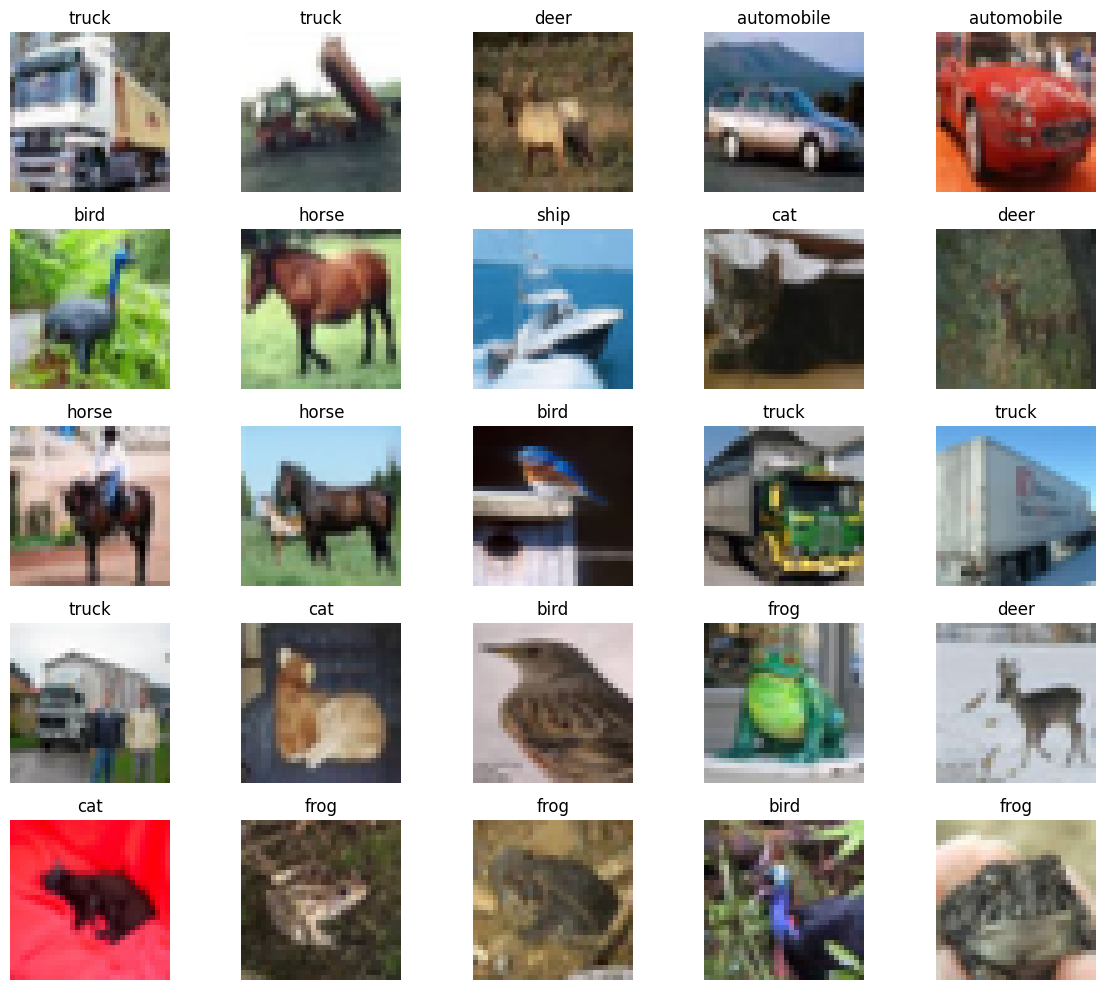

In [5]:
visualize_images(sample,(5,5))

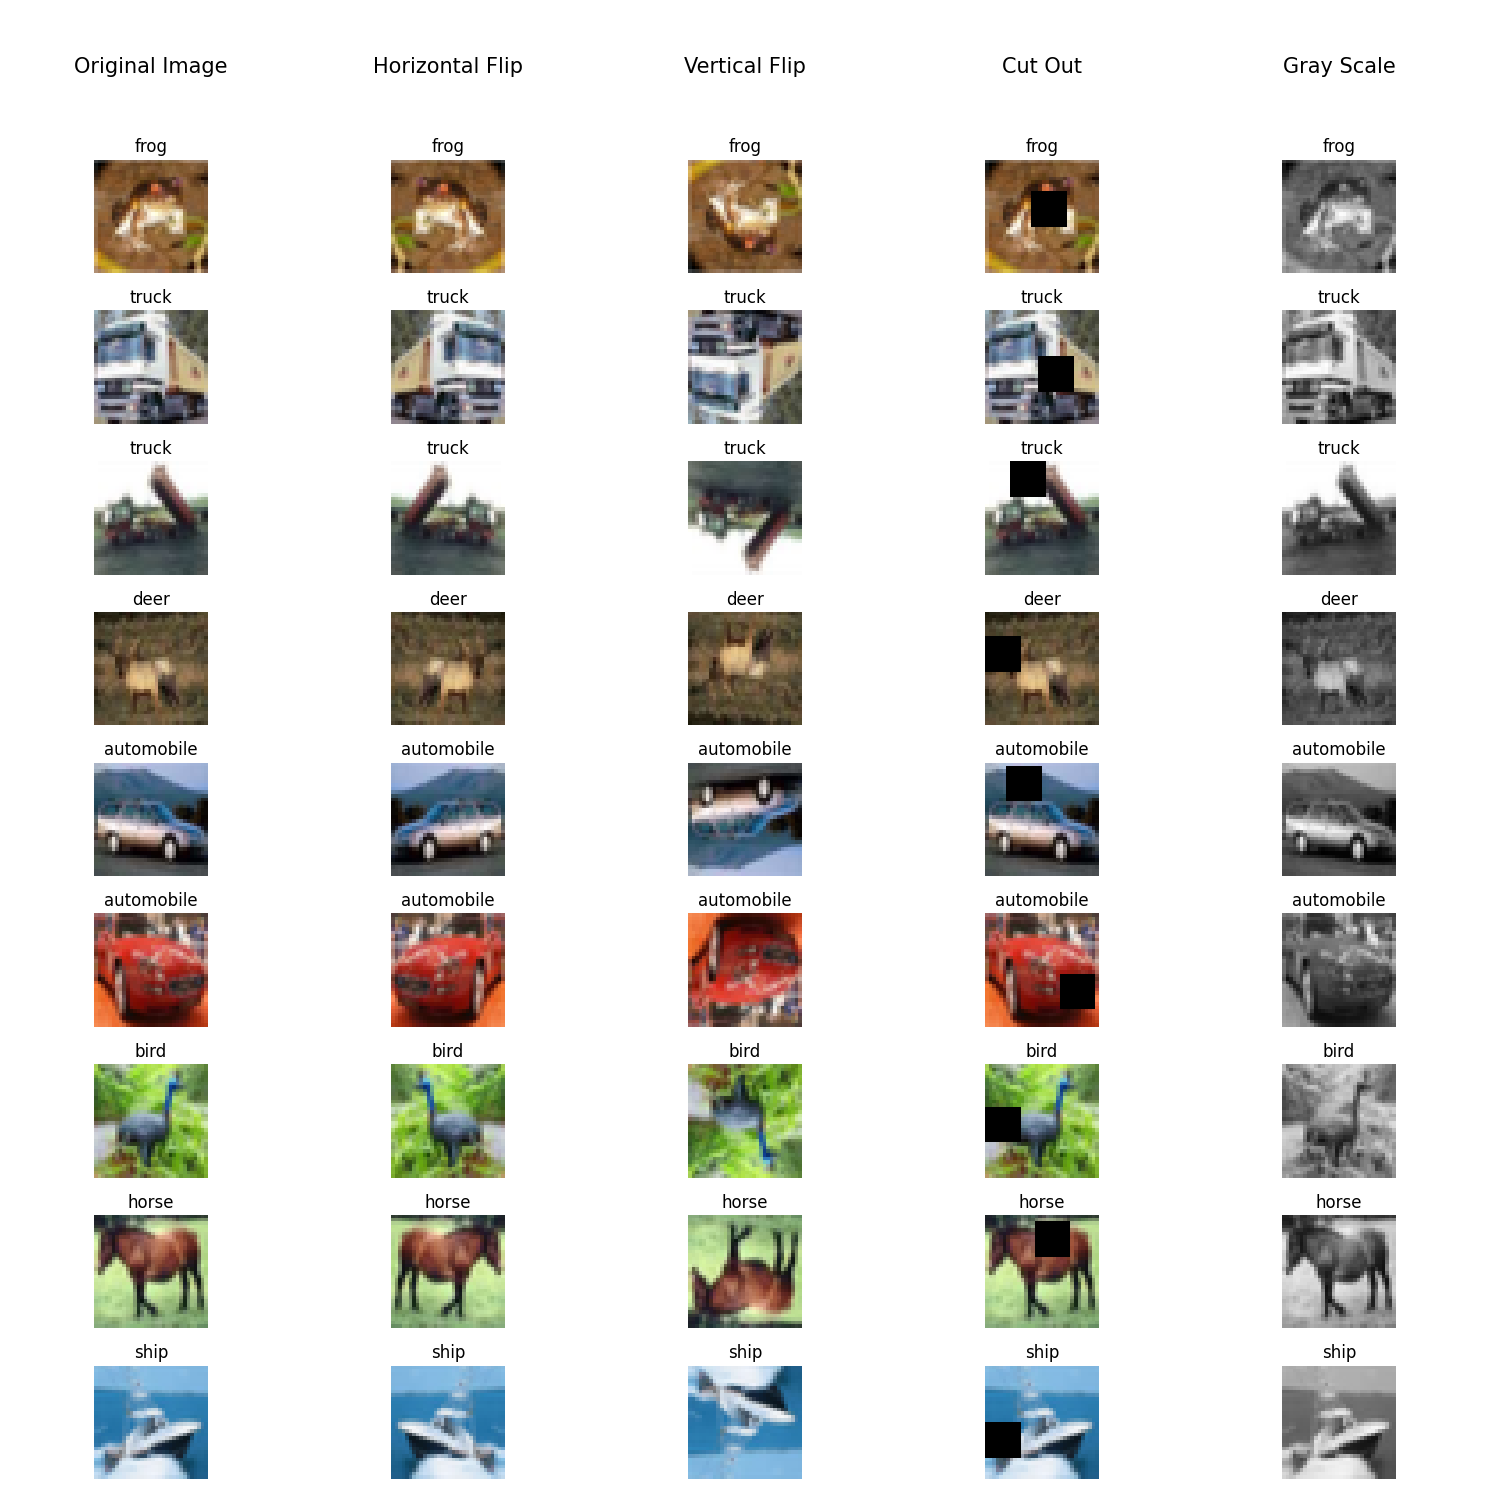

In [6]:
aug_details = {
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=10, max_width=10, min_holes=1, min_height=10,
                               min_width=10, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
}

visualize_augmentated_images(sample,aug_details)

In [7]:
train_data = datasets.CIFAR10(root='./data', train=True,
                                        download=True )
test_data = datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(train_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=True), batch_size=128,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(test_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=False), batch_size=128,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
model = Net(norm_type="gn").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
         GroupNorm-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           1,800
              ReLU-6           [-1, 20, 32, 32]               0
         GroupNorm-7           [-1, 20, 32, 32]              40
           Dropout-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 10, 34, 34]             200
             ReLU-10           [-1, 10, 34, 34]               0
        GroupNorm-11           [-1, 10, 34, 34]              20
          Dropout-12           [-1, 10, 34, 34]               0
        MaxPool2d-13           [-1, 10, 17, 17]               0
           Conv2d-14           [-1, 20,

In [9]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.7,
                       "step_size":3,
                       "gamma":0.2,
                       "max_lr":0.015,
                       "num_epochs":20
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 1


Train: Loss=1.9487 Batch_id=390 Accuracy=23.90: 100%|██████████| 391/391 [00:19<00:00, 19.63it/s]


Test set: Average loss: 1.7687, Accuracy: 3676/10000 (36.76%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 2


Train: Loss=1.7022 Batch_id=390 Accuracy=34.29: 100%|██████████| 391/391 [00:18<00:00, 20.58it/s]


Test set: Average loss: 1.5961, Accuracy: 4276/10000 (42.76%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 3


Train: Loss=1.5577 Batch_id=390 Accuracy=38.18: 100%|██████████| 391/391 [00:19<00:00, 20.10it/s]


Test set: Average loss: 1.4827, Accuracy: 4678/10000 (46.78%)

Adjusting learning rate of group 0 to 6.0006e-04.
Epoch 4


Train: Loss=1.6256 Batch_id=390 Accuracy=41.98: 100%|██████████| 391/391 [00:19<00:00, 19.75it/s]


Test set: Average loss: 1.3467, Accuracy: 5209/10000 (52.09%)

Adjusting learning rate of group 0 to 6.0010e-04.
Epoch 5


Train: Loss=1.5428 Batch_id=390 Accuracy=44.88: 100%|██████████| 391/391 [00:20<00:00, 19.46it/s]


Test set: Average loss: 1.2961, Accuracy: 5420/10000 (54.20%)

Adjusting learning rate of group 0 to 6.0016e-04.
Epoch 6


Train: Loss=1.5493 Batch_id=390 Accuracy=46.99: 100%|██████████| 391/391 [00:18<00:00, 20.62it/s]


Test set: Average loss: 1.1879, Accuracy: 5888/10000 (58.88%)

Adjusting learning rate of group 0 to 6.0023e-04.
Epoch 7


Train: Loss=1.2910 Batch_id=390 Accuracy=48.97: 100%|██████████| 391/391 [00:19<00:00, 20.06it/s]


Test set: Average loss: 1.1558, Accuracy: 5972/10000 (59.72%)

Adjusting learning rate of group 0 to 6.0032e-04.
Epoch 8


Train: Loss=1.5454 Batch_id=390 Accuracy=50.92: 100%|██████████| 391/391 [00:20<00:00, 19.31it/s]


Test set: Average loss: 1.1279, Accuracy: 6015/10000 (60.15%)

Adjusting learning rate of group 0 to 6.0041e-04.
Epoch 9


Train: Loss=1.2001 Batch_id=390 Accuracy=51.67: 100%|██████████| 391/391 [00:19<00:00, 20.48it/s]


Test set: Average loss: 1.0650, Accuracy: 6246/10000 (62.46%)

Adjusting learning rate of group 0 to 6.0052e-04.
Epoch 10


Train: Loss=1.2685 Batch_id=390 Accuracy=53.02: 100%|██████████| 391/391 [00:18<00:00, 20.77it/s]


Test set: Average loss: 1.0377, Accuracy: 6389/10000 (63.89%)

Adjusting learning rate of group 0 to 6.0065e-04.
Epoch 11


Train: Loss=1.2158 Batch_id=390 Accuracy=53.86: 100%|██████████| 391/391 [00:20<00:00, 19.36it/s]


Test set: Average loss: 1.0222, Accuracy: 6422/10000 (64.22%)

Adjusting learning rate of group 0 to 6.0078e-04.
Epoch 12


Train: Loss=1.1269 Batch_id=390 Accuracy=54.77: 100%|██████████| 391/391 [00:19<00:00, 19.74it/s]


Test set: Average loss: 0.9977, Accuracy: 6534/10000 (65.34%)

Adjusting learning rate of group 0 to 6.0093e-04.
Epoch 13


Train: Loss=1.2018 Batch_id=390 Accuracy=55.58: 100%|██████████| 391/391 [00:18<00:00, 20.78it/s]


Test set: Average loss: 0.9742, Accuracy: 6590/10000 (65.90%)

Adjusting learning rate of group 0 to 6.0109e-04.
Epoch 14


Train: Loss=1.2837 Batch_id=390 Accuracy=56.42: 100%|██████████| 391/391 [00:18<00:00, 21.08it/s]


Test set: Average loss: 0.9371, Accuracy: 6774/10000 (67.74%)

Adjusting learning rate of group 0 to 6.0127e-04.
Epoch 15


Train: Loss=1.3672 Batch_id=390 Accuracy=57.21: 100%|██████████| 391/391 [00:19<00:00, 19.84it/s]


Test set: Average loss: 0.9333, Accuracy: 6758/10000 (67.58%)

Adjusting learning rate of group 0 to 6.0145e-04.
Epoch 16


Train: Loss=1.1430 Batch_id=390 Accuracy=57.85: 100%|██████████| 391/391 [00:18<00:00, 20.80it/s]


Test set: Average loss: 0.8915, Accuracy: 6905/10000 (69.05%)

Adjusting learning rate of group 0 to 6.0165e-04.
Epoch 17


Train: Loss=1.1924 Batch_id=390 Accuracy=58.08: 100%|██████████| 391/391 [00:18<00:00, 21.20it/s]


Test set: Average loss: 0.8773, Accuracy: 6984/10000 (69.84%)

Adjusting learning rate of group 0 to 6.0187e-04.
Epoch 18


Train: Loss=1.3416 Batch_id=390 Accuracy=58.83: 100%|██████████| 391/391 [00:19<00:00, 19.77it/s]


Test set: Average loss: 0.8727, Accuracy: 6996/10000 (69.96%)

Adjusting learning rate of group 0 to 6.0209e-04.
Epoch 19


Train: Loss=1.1750 Batch_id=390 Accuracy=59.21: 100%|██████████| 391/391 [00:18<00:00, 20.93it/s]


Test set: Average loss: 0.8707, Accuracy: 7019/10000 (70.19%)

Adjusting learning rate of group 0 to 6.0233e-04.
Epoch 20


Train: Loss=0.9858 Batch_id=390 Accuracy=59.53: 100%|██████████| 391/391 [00:18<00:00, 21.07it/s]


Test set: Average loss: 0.8584, Accuracy: 7020/10000 (70.20%)

Adjusting learning rate of group 0 to 6.0258e-04.


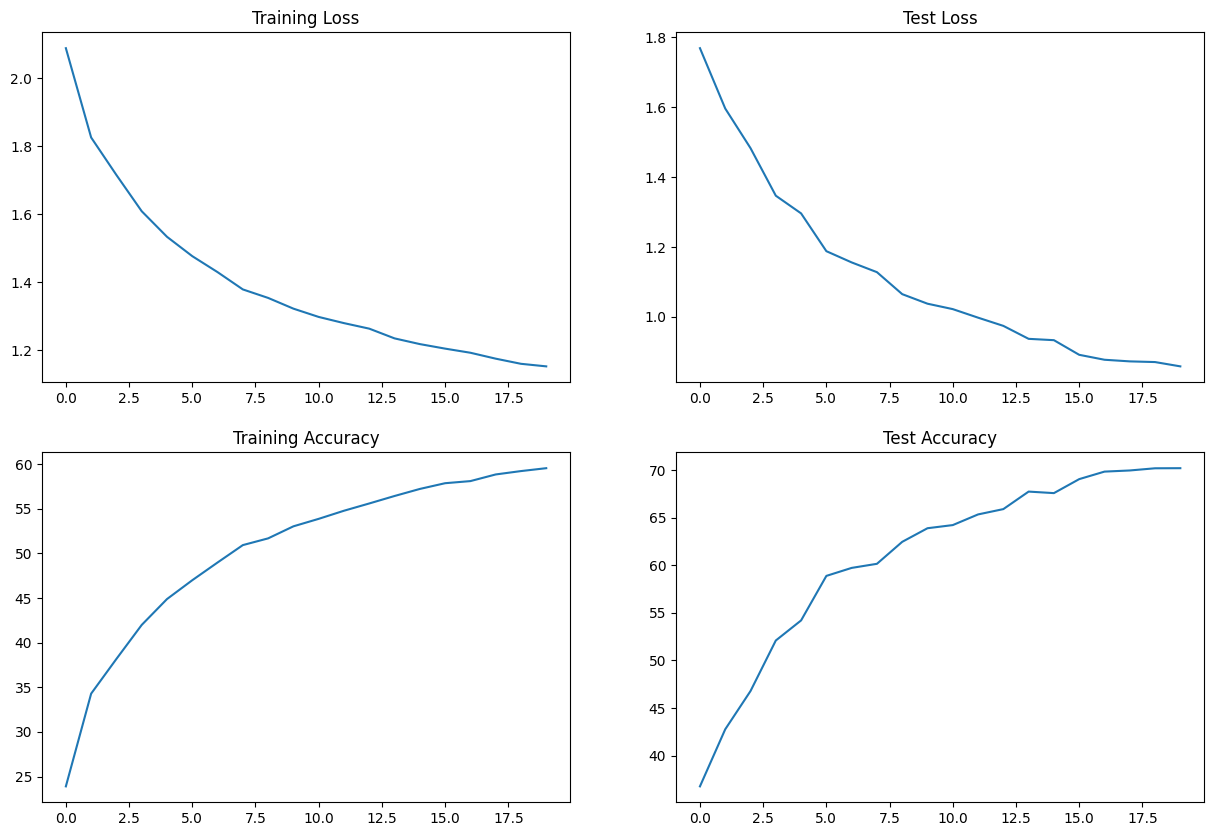

In [10]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

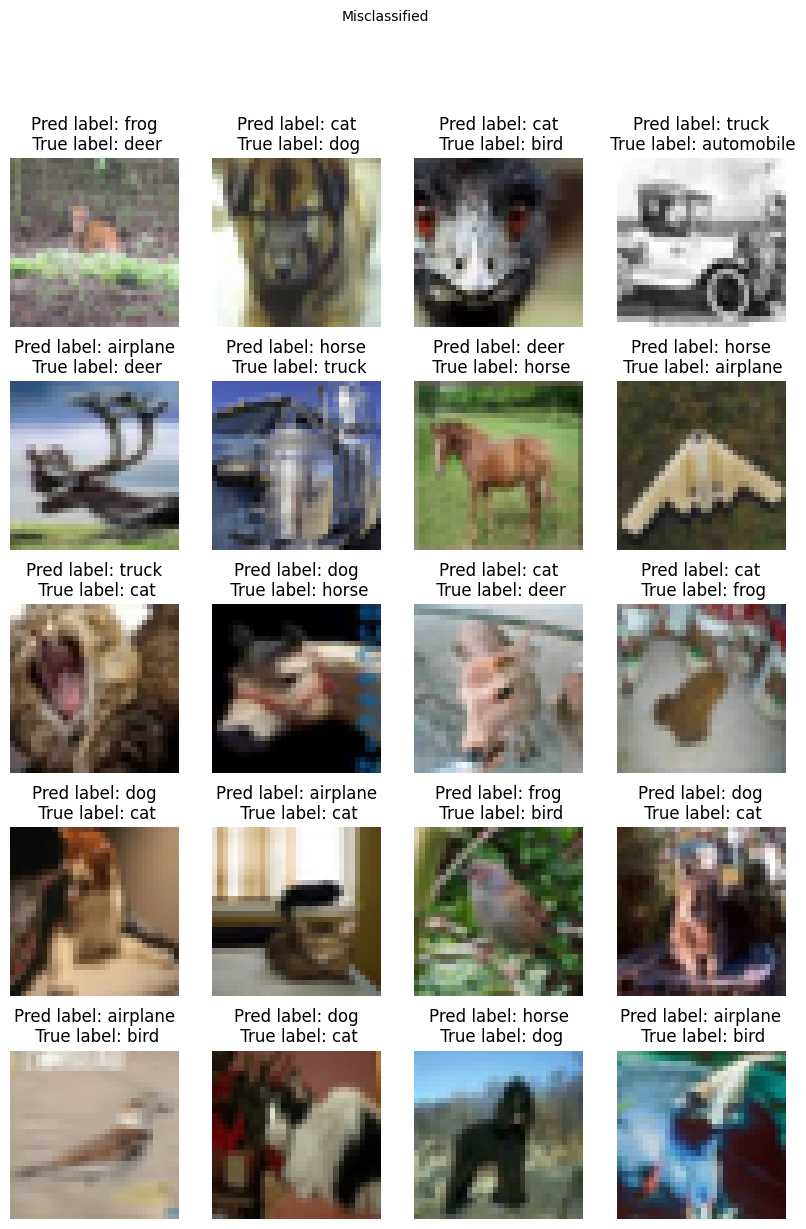

In [11]:
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import numpy as np

grid_size = (4,4)
plot_misclassified(model,test_loader,test_data,device,mean,std)


Accuracy of airplane : 63 %

Accuracy of automobile : 94 %

Accuracy of  bird : 49 %

Accuracy of   cat : 42 %

Accuracy of  deer : 56 %

Accuracy of   dog : 53 %

Accuracy of  frog : 85 %

Accuracy of horse : 83 %

Accuracy of  ship : 91 %

Accuracy of truck : 73 %
{'airplane': 63.888888888888886, 'automobile': 94.87179487179488, 'bird': 49.42528735632184, 'cat': 42.5, 'deer': 56.94444444444444, 'dog': 53.42465753424658, 'frog': 85.3932584269663, 'horse': 83.33333333333333, 'ship': 91.86046511627907, 'truck': 73.33333333333333}


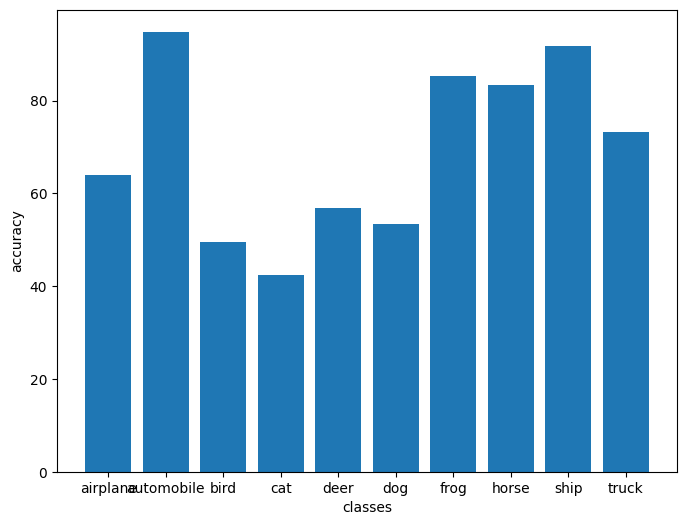

In [12]:
calculate_accuracy_per_class(model,device,test_loader,test_data)